# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from pytorch_tabnet.tab_model import TabNetClassifier

import warnings
warnings.filterwarnings("ignore")

import preprocessing

pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [16]:
def chip_counts(dataframe):
    return dataframe.chipOrControl.value_counts()

In [93]:
df = pd.read_csv("../data/chipVariantCalling_run1.tsv", sep='\t')
# df2 = pd.read_csv("../data/chipVariantCalling_run2.tsv", sep='\t')

dataset1 = df
# dataset2 = df2

df

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
1,4010289633,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
2,4010289633,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
3,4010289633,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
4,4010289633,7282,29,0.004000,0.003600,MODERATE,GNB1,chr1:1747250_T/C,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.700000,1.061729,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137944,4010290016,731,2,0.002700,0.002800,MODERATE,ZFY,chrY:2848011_C/T,Blank,Blank,NaN,2:2,371:357,1:1,31.000000,1.039170,NaN
1137945,4010290016,731,2,0.002700,0.002800,MODERATE,ZFY,chrY:2848029_C/T,Blank,Blank,NaN,2:2,367:359,1:1,37.000000,1.022260,NaN
1137946,4010290016,731,2,0.002700,0.002800,MODERATE,ZFY,chrY:2848029_C/T,Blank,Blank,NaN,2:2,367:359,1:1,37.000000,1.022260,NaN
1137947,4010290016,731,2,0.002700,0.002800,MODERATE,ZFY,chrY:2848029_C/T,Blank,Blank,NaN,2:2,367:359,1:1,37.000000,1.022260,NaN


Remove `NaN` and `Unknown` values within `chipOrControl`

In [94]:
df = preprocessing.remove_redundant(df)
# df2 = preprocessing.remove_redundant(df2)

In [4]:
df.head()

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
4,7282,29,0.004000,0.003600,MODERATE,GNB1,chr1:1747250_T/C,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.700000,1.061729,CHIP
8,7282,24,0.003300,0.003300,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,3626:3607,12:12,34.900000,1.005270,CHIP
12,178,2,0.011200,0.012000,MODERATE,NRAS,chr1:115256571_T/C,Baseline,Male,MS2083,2:2,88:88,1:1,37.000000,1.000000,CHIP
13,1773,6,0.003400,0.003500,MODERATE,NRAS,chr1:115258674_T/C,Baseline,Male,MS2083,2:2,889:874,3:3,37.000000,1.017150,CHIP


Store names of all genes

In [5]:
genes = df.SYMBOL.unique()
# genes2 = df2.SYMBOL.unique()

Separate `loci` into three separate columns: `chromosome` | `chromosome_location` | `nucleotide`

In [95]:
df = preprocessing.loci_split(df)
# df2 = preprocessing.loci_split(df2)

In [24]:
df['chromosome_loc'] = df['chromosome_loc'].astype(int)

In [7]:
df.head(3)

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,chromosome,chromosome_loc,nucleotide
0,7281,26,0.003600,0.003300,MODERATE,GNB1,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP,chr1,1747196,T/C
4,7282,29,0.004000,0.003600,MODERATE,GNB1,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.700000,1.061729,CHIP,chr1,1747250,T/C
8,7282,24,0.003300,0.003300,MODERATE,GNB1,Baseline,Male,MS2083,2:2,3626:3607,12:12,34.900000,1.005270,CHIP,chr1,1747256,T/C


Columns `REFBIAS` and `VARBIAS` are strings. Change to floats.

In [96]:
df = preprocessing.convert_ratios(df, ["REFBIAS", "VARBIAS"])
# df2 = preprocessing.convert_ratios(df2, ["REFBIAS", "VARBIAS"])

In [107]:
df = df[df["BIAS"].str.contains("2:2")]
df = df[df['ODDRATIO'] > 0]

In [105]:
from collections import Counter

counts = Counter(df.chromosome_loc)
df[df.chromosome_loc.isin([key for key in counts if counts[key] > 4])].MSID.value_counts()

MS10992    2426
MS12764    2344
MS12115    2281
MS3685     2179
MS7936     2118
           ... 
MS4799      446
MS8519      402
MS917       324
MS13311     239
MS7933      163
Name: MSID, Length: 88, dtype: int64

In [52]:
asdf = df[df.chromosome_loc.isin([key for key in counts if counts[key] < 4])]

In [74]:
for msid in asdf.MSID.unique():
    value = asdf[asdf["MSID"].str.contains("MS11222")].iloc[0].chipOrControl
    freq = asdf[asdf["MSID"].str.contains(msid)].chipOrControl.value_counts()[0]
    actual = df[df["MSID"].str.contains(msid)].chipOrControl.value_counts()[0]
    
    print(msid, value, freq/actual*100)    

MS2083 Control 8.402489626556017
MS19025 Control 6.09375
MS14128 Control 2.3006955591225253
MS12593 Control 2.294455066921606
MS3780 Control 1.7473789316025963
MS7722 Control 3.551401869158879
MS16369 Control 2.437673130193906
MS14726 Control 3.618421052631579
MS12481 Control 4.626569729015202
MS15959 Control 16.78832116788321
MS17705 Control 7.340823970037453
MS6729 Control 3.1604054859868813
MS12115 Control 9.370139968895801
MS3685 Control 5.5908513341804325
MS10992 Control 5.061349693251533
MS16523 Control 3.4533793783917117
MS12457 Control 2.3582538886101356
MS6594 Control 4.13135593220339
MS7936 Control 2.459016393442623
MS18957 Control 1.4293276866066702
MS10108 Control 1.3513513513513513
MS12764 Control 2.149648615130219
MS17215 Control 1.917098445595855
MS15147 Control 2.0493712156497437
MS15567 Control 3.0286034772854737
MS15229 Control 1.9133370849746762
MS5903 Control 1.3775510204081634
MS8886 Control 1.6233766233766231
MS9695 Control 2.632816173013634
MS3098 Control 1.88571

In [81]:
df[df["MSID"].str.contains("MS5755")].QUAL.mean()

35.323505976095596

In [49]:
df[df["MSID"].str.contains("MS12745")]

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,chromosome,chromosome_loc,nucleotide
481698,974,4,0.004100,0.004200,MODERATE,GNB1,Baseline,Male,MS12745,2:2,1.016667,1.000000,37.000000,1.016650,CHIP,chr1,1747216,A/G
481702,974,4,0.004100,0.003100,MODERATE,GNB1,Baseline,Male,MS12745,2:2,1.014553,1.000000,27.500000,1.014540,CHIP,chr1,1747225,A/G
481706,1006,4,0.004000,0.004100,MODERATE,GNB1,Baseline,Male,MS12745,2:2,1.010081,1.000000,34.000000,1.010070,CHIP,chr1,1747256,T/C
481710,1007,4,0.004000,0.004200,MODERATE,GNB1,Baseline,Male,MS12745,2:2,1.010060,1.000000,37.000000,1.010050,CHIP,chr1,1747259,T/C
481714,1007,3,0.003000,0.002100,MODERATE,GNB1,Baseline,Male,MS12745,2:0,1.020121,0.000000,24.300000,0.000000,CHIP,chr1,1747271,T/G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486476,1435,6,0.004200,0.004200,MODERATE,SRY,Y3,Male,MS12745,2:2,1.016949,1.000000,37.000000,1.016940,CHIP,chrY,2655464,T/C
486479,1435,6,0.004200,0.004200,MODERATE,SRY,Y3,Male,MS12745,2:2,1.018362,1.000000,37.000000,1.018350,CHIP,chrY,2655469,C/T
486482,1435,4,0.002800,0.002800,MODERATE,SRY,Y3,Male,MS12745,2:2,1.019774,1.000000,37.000000,1.019760,CHIP,chrY,2655475,T/C
486485,3133,8,0.002600,0.002700,MODERATE,ZFY,Y3,Male,MS12745,2:2,1.052180,1.000000,37.000000,1.052180,CHIP,chrY,2848018,A/G


Run Nick's code. I believe it changes data types to numerics

In [15]:
objs = {}
lst = []
for i in df.columns:
    if df.dtypes[i] == object:
        if len(df[f"{i}"].unique()) <= 100:
            objs[i] = len(df[f"{i}"].unique())
            lst.append(i)

In [16]:
objs = {}
lst = []
for i in df2.columns:
    if df2.dtypes[i] == object:
        if len(df2[f"{i}"].unique()) <= 100:
            objs[i] = len(df2[f"{i}"].unique())
            lst.append(i)

In [17]:
for i in lst:
    k = i
    dict = {}
    df_new = df
    for ix, i in zip(range(len(df_new[i].unique())), df_new[i].unique() ):
        dict[i] = ix
    df = df.replace({f"{k}": dict})
    df[f"{k}"] = df[f"{k}"].astype(str).astype(float)

In [18]:
for i in lst:
    k = i
    dict = {}
    df2_new = df2
    for ix, i in zip(range(len(df2_new[i].unique())), df2_new[i].unique() ):
        dict[i] = ix
    df2 = df2.replace({f"{k}": dict})
    df2[f"{k}"] = df2[f"{k}"].astype(str).astype(float)

In [19]:
# LOCI not required in final model
df.drop(['chromosome_loc'], axis=1, inplace=True)
df2.drop(['chromosome_loc'], axis=1, inplace=True)

In [20]:
# LOCI not required in final model
df.drop(['chromosome', 'nucleotide'], axis=1, inplace=True)
df2.drop(['chromosome', 'nucleotide'], axis=1, inplace=True)

In [21]:
df.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,7281,26,0.003600,0.003300,0.000000,0.000000,0.000000,0.000000,0.000000,1.013348,0.857143,34.000000,1.182210,0.000000
4,7282,29,0.004000,0.003600,0.000000,0.000000,0.000000,0.000000,0.000000,1.009151,1.071429,32.700000,1.061729,0.000000
8,7282,24,0.003300,0.003300,0.000000,0.000000,0.000000,0.000000,0.000000,1.005268,1.000000,34.900000,1.005270,0.000000
12,178,2,0.011200,0.012000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,37.000000,1.000000,0.000000
13,1773,6,0.003400,0.003500,0.000000,1.000000,0.000000,0.000000,0.000000,1.017162,1.000000,37.000000,1.017150,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536717,711,4,0.005600,0.005700,0.000000,28.000000,1.000000,1.000000,0.000000,1.008523,1.000000,37.000000,1.008510,1.000000
536725,711,2,0.002800,0.002800,0.000000,28.000000,1.000000,1.000000,0.000000,1.008499,1.000000,31.000000,1.008490,1.000000
536733,711,2,0.002800,0.002900,1.000000,28.000000,1.000000,1.000000,0.000000,1.005666,1.000000,37.000000,1.005660,1.000000
536734,711,2,0.002800,0.002900,0.000000,28.000000,1.000000,1.000000,0.000000,1.008499,1.000000,37.000000,1.008490,1.000000


### ONE HOT ENCODE "SYMBOL" with pd.get_dummies()

In [22]:
df_model = pd.concat([df,pd.get_dummies(df['SYMBOL'], prefix='GENE')],axis=1)
df_model2 = pd.concat([df2,pd.get_dummies(df2['SYMBOL'], prefix='GENE')],axis=1)

In [23]:
df_model.drop(['SYMBOL'],axis=1, inplace=True)
df_model2.drop(['SYMBOL'],axis=1, inplace=True)

In [24]:
dummy_genes = df_model.columns[15:]
dummy_genes2 = df_model2.columns[15:]

d = {}
d2 = {}

for i in range(len(dummy_genes)):
    d[dummy_genes[i]] = genes[i]

for i in range(len(dummy_genes2)):
    d2[dummy_genes2[i]] = genes2[i]

In [25]:
df_model = df_model.rename(d, axis=1)  # Renaming columns
df_model2 = df_model2.rename(d2, axis=1)  # Renaming columns

### Retain top 5 genes

In [26]:
# Remove other genes from dataframe
df_model = df_model[['DP', 'VD', 'AF', 'HIAF', 'IMPACT', 'sampleTimePt', 'gender', 'BIAS',
       'REFBIAS', 'VARBIAS', 'QUAL', 'ODDRATIO', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR']]

df_model2 = df_model2[['DP', 'VD', 'AF', 'HIAF', 'IMPACT', 'sampleTimePt', 'gender', 'BIAS',
       'REFBIAS', 'VARBIAS', 'QUAL', 'ODDRATIO', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR']]


# Create separate dataframe
encoder = df_model[['DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR']]
encoder2 = df_model2[['DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR']]

# Sum of one hot encode. Value = 1 if exists, 0 otherwise
p = encoder[list(encoder)].sum(axis=1).array
p2 = encoder2[list(encoder2)].sum(axis=1).array

# Flip values
for i in range(len(p)):
    if p[i] == 0:
        p[i] = 1
    else:
        p[i] = 0

# Flip values
for i in range(len(p2)):
    if p2[i] == 0:
        p2[i] = 1
    else:
        p2[i] = 0
        
# Add to df
df_model["other"] = p
df_model2["other"] = p2

# One hot encode `BIAS`

In [27]:
# bias_str = ["twotwo", "onezero", "zerotwo", "onetwo", "twozero", "oneone", "zerozero", "twoone"]
# bias_str2 = ["twotwo", "twozero", "onezero", "zerotwo", "oneone", "twoone", "onetwo", "zerozero"]

# df_model = pd.concat([df_model, pd.get_dummies(df_model['BIAS'])],axis=1)
# df_model2 = pd.concat([df_model2, pd.get_dummies(df_model2['BIAS'])],axis=1)

In [28]:
# dummy_bias = pd.concat([df,pd.get_dummies(df['BIAS'])],axis=1).columns[14:]


# b = {}
# b2 = {}

# for i in range(len(dummy_bias)):
#     b[dummy_bias[i]] = bias_str[i]

# for i in range(len(dummy_bias)):
#     b2[dummy_bias[i]] = bias_str2[i]

In [29]:
# df_model.drop(['BIAS'],axis=1, inplace=True)
# df_model2.drop(['BIAS'],axis=1, inplace=True)

In [30]:
# df_model = df_model.rename(b, axis=1)  # Renaming columns
# df_model2 = df_model2.rename(b2, axis=1)  # Renaming columns

# Create closed datasets
- Remove rows in relation to outliers
- Compare values at the 98th percentile
- Reject QUAL values less than 30

In [31]:
print(df_model.ODDRATIO.quantile(0.98))
print(df_model.REFBIAS.quantile(0.98))
print(df_model.VARBIAS.quantile(0.98))

print(df_model.ODDRATIO.quantile(0.99))
print(df_model.REFBIAS.quantile(0.99))
print(df_model.VARBIAS.quantile(0.99))

print()

print(df_model2.ODDRATIO.quantile(0.98))
print(df_model2.REFBIAS.quantile(0.98))
print(df_model2.VARBIAS.quantile(0.98))

print(df_model2.ODDRATIO.quantile(0.99))
print(df_model2.REFBIAS.quantile(0.99))
print(df_model2.VARBIAS.quantile(0.99))

2.0372048
1.0690527335697206
1.5
2.0983787999999985
54.97636363636279
2.0

14.7623265426631
1.1422222626258425
11.289523809523661
18.541455123750726
12.266153846148743
14.566349206349095


The results above display the second dataset contains more noise IF ratios are examined as quantitative values

In [32]:
low_odd = df_model[df_model['ODDRATIO'] < 3]
low_odd_refbias = low_odd[low_odd['REFBIAS'] < 1.3]
low_odd_refbias_varbias = low_odd_refbias[low_odd_refbias['VARBIAS'] <= 2]
df_model_removed = low_odd_refbias_varbias[low_odd_refbias_varbias['QUAL'] >= 30]
# df_model_removed = df_model_removed[df_model_removed['DP'] >= ]

low_odd = df_model2[df_model2['ODDRATIO'] < 3]
low_odd_refbias = low_odd[low_odd['REFBIAS'] < 1.3]
low_odd_refbias_varbias = low_odd_refbias[low_odd_refbias['VARBIAS'] <= 2]
df_model_removed2 = low_odd_refbias_varbias[low_odd_refbias_varbias['QUAL'] >= 30]
# df_model_removed = df_model_removed[df_model_removed['DP'] >= 30]

#### Drop AF due to high correlation with HIAF. Drop duplicate rows

In [33]:
df_model.drop('AF', axis = 1, inplace = True)
df_model2.drop('AF', axis = 1, inplace = True)
df_model_removed.drop('AF', axis = 1, inplace = True)
df_model_removed2.drop('AF', axis = 1, inplace = True)

In [34]:
df_model.drop_duplicates(inplace=True)
df_model2.drop_duplicates(inplace=True)
df_model_removed.drop_duplicates(inplace=True)
df_model_removed2.drop_duplicates(inplace=True)

In [35]:
df_model_removed.describe()

,DP,VD,HIAF,IMPACT,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,DNMT3A,TET2,TP53,ASXL1,BCOR,other
count,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000
mean,5867.196308,109.637655,0.010700,0.053702,0.521880,0.481979,0.069432,0.986892,0.978736,35.722231,1.019106,0.446873,0.001764,0.018995,0.037767,0.006549,0.020155,0.914769
std,13124.963334,2004.422850,0.065289,0.225429,0.499523,0.499678,0.474893,0.186432,0.213639,1.877877,0.228002,0.497172,0.041964,0.136509,0.190632,0.080664,0.140532,0.279226
min,2.000000,2.000000,0.001900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,556.000000,2.000000,0.002800,0.000000,0.000000,0.000000,0.000000,1.012594,1.000000,35.000000,1.013130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1270.000000,4.000000,0.003500,0.000000,1.000000,0.000000,0.000000,1.019914,1.000000,37.000000,1.022420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5412.500000,17.000000,0.005300,0.000000,1.000000,1.000000,0.000000,1.028400,1.000000,37.000000,1.037590,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,455487.000000,146473.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.295203,2.000000,37.000000,2.977520,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Normalise Data
Create new dataframes to be trained/tested within models by normalising quantitative variables

In [36]:
df_model_removed2

,DP,VD,HIAF,IMPACT,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,DNMT3A,TET2,TP53,ASXL1,BCOR,other
0,2036,6,0.004400,0.000000,0.000000,0.000000,0.000000,0.957230,1.000000,35.000000,1.044670,0.000000,0,0,0,0,0,1
5,2036,7,0.003500,1.000000,0.000000,0.000000,0.000000,0.988224,0.750000,35.300000,1.317450,0.000000,0,0,0,0,0,1
9,2040,5,0.002100,1.000000,0.000000,0.000000,0.000000,0.988166,0.666667,31.800000,1.481960,0.000000,0,0,0,0,0,1
13,2041,6,0.002500,1.000000,0.000000,0.000000,0.000000,0.983415,1.000000,32.700000,1.016860,0.000000,0,0,0,0,0,1
17,2037,5,0.002800,1.000000,0.000000,0.000000,0.000000,0.894942,0.666667,32.200000,1.342210,0.000000,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692971,2130,9,0.003800,1.000000,1.000000,1.000000,0.000000,0.915913,1.250000,34.100000,1.364554,1.000000,0,0,0,0,1,0
692986,2076,6,0.002900,1.000000,1.000000,1.000000,1.000000,0.824007,0.000000,35.400000,0.000000,1.000000,0,0,0,0,1,0
692993,2069,7,0.003500,1.000000,1.000000,1.000000,1.000000,0.747064,0.000000,35.900000,0.000000,1.000000,0,0,0,0,1,0
693021,4805,13,0.002700,1.000000,1.000000,1.000000,0.000000,1.000839,0.857143,35.000000,1.167610,1.000000,0,0,0,0,1,0


In [37]:
def normalise(dataframe):
    norms = dataframe[['DP', 'VD', 'HIAF', 'REFBIAS', 'VARBIAS', 'QUAL', 'ODDRATIO']]
    norms = (norms-norms.mean())/norms.std()
#     norms = pd.concat([norms, dataframe[['IMPACT', 'sampleTimePt', 'gender', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1',
#                                            'BCOR', 'other', 'twotwo', 'onezero', 'zerotwo', 'onetwo', 'twozero',
#                                          'oneone', 'zerozero', 'twoone'] ]],axis=1)
    
    norms = pd.concat([norms, dataframe[['IMPACT', 'sampleTimePt', 'gender', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1',
                                       'BCOR', 'other'] ]],axis=1)
    
    return norms 

In [38]:
norm_df_model = normalise(df_model)
norm_df_model2 = normalise(df_model2)
norm_df_model_removed = normalise(df_model_removed)
norm_df_model_removed2 = normalise(df_model_removed2)

In [39]:
norm_df_model

,DP,VD,HIAF,REFBIAS,VARBIAS,QUAL,ODDRATIO,IMPACT,sampleTimePt,gender,chipOrControl,DNMT3A,TET2,TP53,ASXL1,BCOR,other
0,0.111750,-0.039057,-0.111933,-0.040965,-0.058840,-0.478556,-0.010949,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1
4,0.111826,-0.038046,-0.107488,-0.040976,0.036889,-0.970238,-0.013579,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1
8,0.111826,-0.039731,-0.111933,-0.040987,0.004980,-0.138160,-0.014812,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1
12,-0.424884,-0.047143,0.016982,-0.041001,0.004980,0.656097,-0.014927,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1
13,-0.304381,-0.045796,-0.108970,-0.040954,0.004980,0.656097,-0.014552,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536717,-0.384615,-0.046469,-0.076370,-0.040978,0.004980,0.656097,-0.014741,0.000000,1.000000,1.000000,1.000000,0,0,0,0,1,0
536725,-0.384615,-0.047143,-0.119342,-0.040978,0.004980,-1.613208,-0.014741,0.000000,1.000000,1.000000,1.000000,0,0,0,0,1,0
536733,-0.384615,-0.047143,-0.117860,-0.040986,0.004980,0.656097,-0.014803,1.000000,1.000000,1.000000,1.000000,0,0,0,0,1,0
536734,-0.384615,-0.047143,-0.117860,-0.040978,0.004980,0.656097,-0.014741,0.000000,1.000000,1.000000,1.000000,0,0,0,0,1,0


# 2nd May Workings

In [40]:
df_model.columns

Index(['DP', 'VD', 'HIAF', 'IMPACT', 'sampleTimePt', 'gender', 'BIAS',
       'REFBIAS', 'VARBIAS', 'QUAL', 'ODDRATIO', 'chipOrControl', 'DNMT3A',
       'TET2', 'TP53', 'ASXL1', 'BCOR', 'other'],
      dtype='object')

In [41]:
df_model.drop(['DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR', 'other'], axis=1 , inplace=True)

In [42]:
df_model.drop(['QUAL', 'BIAS', 'VARBIAS', 'IMPACT'], axis=1 , inplace=True)

In [43]:
df_other = df_model[df_model['DP'] > 10]
df_other = df_other[df_other['ODDRATIO'] < 1.5]
df_other = df_other[df_other['REFBIAS'] < 2]

In [44]:
df_other = df_other[df_other['HIAF'] < 0.027]

In [45]:
def normalise(dataframe):
    norms = dataframe[['DP', 'VD', 'HIAF', 'REFBIAS', 'ODDRATIO']]
    norms = (norms-norms.mean())/norms.std()
#     norms = pd.concat([norms, dataframe[['IMPACT', 'sampleTimePt', 'gender', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1',
#                                            'BCOR', 'other', 'twotwo', 'onezero', 'zerotwo', 'onetwo', 'twozero',
#                                          'oneone', 'zerozero', 'twoone'] ]],axis=1)
    
    norms = pd.concat([norms, dataframe[['sampleTimePt', 'gender', 'chipOrControl'] ]],axis=1)
    
    return norms 

In [46]:
df_other1 = normalise(df_other)

# Data

In [47]:
X = df_model.drop('chipOrControl', axis = 1) 
y = df_model['chipOrControl'] 

X_other = df_other.drop('chipOrControl', axis = 1) 
y_other = df_other['chipOrControl'] 

X_other1 = df_other1.drop('chipOrControl', axis = 1) 
y_other1 = df_other1['chipOrControl'] 


X_2 = df_model2.drop('chipOrControl', axis = 1) 
y_2 = df_model2['chipOrControl'] 

norm_X = norm_df_model.drop('chipOrControl', axis = 1) 
norm_y = norm_df_model['chipOrControl'] 

norm_X_2 = norm_df_model2.drop('chipOrControl', axis = 1) 
norm_y_2 = norm_df_model2['chipOrControl']

removed_X = df_model_removed.drop('chipOrControl', axis = 1) 
removed_y = df_model_removed['chipOrControl'] 

removed_X_2 = df_model_removed2.drop('chipOrControl', axis = 1) 
removed_y_2 = df_model_removed2['chipOrControl'] 

norm_removed_X = norm_df_model_removed.drop('chipOrControl', axis = 1) 
norm_removed_y = norm_df_model_removed['chipOrControl'] 

norm_removed_X_2 = norm_df_model_removed2.drop('chipOrControl', axis = 1) 
norm_removed_y_2 = norm_df_model_removed2['chipOrControl'] 

# Random Forests
Run a random forest classifer, training/testing on individual datasets

#### Dataset 1

In [83]:
# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

# instantatiate the RFC with 100 ensemble members
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.638


In [85]:
for i in np.arange(0.0, 1.0, 0.1):
    y_pred_prob = (clf.predict_proba(X_test)[:,1] >= i)
    print(f"Threshold {round(i, 2)}", 'Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred_prob),3)))

Threshold 0.0 Accuracy 0.449
Threshold 0.1 Accuracy 0.498
Threshold 0.2 Accuracy 0.545
Threshold 0.3 Accuracy 0.595
Threshold 0.4 Accuracy 0.622
Threshold 0.5 Accuracy 0.637
Threshold 0.6 Accuracy 0.633
Threshold 0.7 Accuracy 0.62
Threshold 0.8 Accuracy 0.601
Threshold 0.9 Accuracy 0.576


In [51]:
# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X_other, y_other, train_size=.8, random_state=0)

# instantatiate the RFC with 100 ensemble members
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.641


#### Dataset 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(X)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(y, run2_pred),3)))

#### Dataset 1 filtered

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(removed_X, removed_y, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(removed_X_2)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(removed_y_2, run2_pred),3)))

#### Dataset 2 filtered

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(removed_X_2, removed_y_2, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(removed_X)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(removed_y, run2_pred),3)))

#### Normalised Dataset 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_X, norm_y, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(norm_X_2)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(norm_y_2, run2_pred),3)))

#### Normalised Datset 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_X_2, norm_y_2, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(norm_X)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(norm_y, run2_pred),3)))

#### Normalised Dataset 1 Filtered

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_removed_X, norm_removed_y, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(norm_removed_X_2)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(norm_removed_y_2, run2_pred),3)))

#### Normalised Dataset 2 Filtered

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_removed_X_2, norm_removed_y_2, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(norm_removed_X)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(norm_removed_y, run2_pred),3)))

## Random Forests Tuning Hyperparameters

In [67]:
X = df_model.drop('chipOrControl', axis = 1) # drop the target variable for the features
y = df_model['chipOrControl'] # create a target dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

In [71]:
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200], 'min_samples_split': [2, 40], 'min_samples_leaf': [1, 5, 10], 
              'max_features': ['auto'], 'max_depth': ['None', 3, 5], 'criterion': ['gini'], 'bootstrap': [False]}

random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, verbose=2, n_jobs = -1) 
random_forest_CV.fit(X_train,y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.8min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': ['None', 3, 5], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 40],
                         'n_estimators': [100, 200]},
             verbose=2)

In [72]:
print(random_forest_CV.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 40, 'n_estimators': 100}


In [ ]:
print(random_forest_CV.best_params_)

In [ ]:
y_pred = random_forest_CV.predict(X_test)

In [ ]:
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

In [73]:
# instantatiate the RFC with 100 ensemble members
clf = RandomForestClassifier(max_depth = 5, min_samples_leaf = 5, min_samples_split = 40, n_estimators = 100, criterion ='gini')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.558


In [ ]:
run2_pred = clf.predict(X_2)
print('Accuracy {0}'.format(np.round(accuracy_score(y_2, run2_pred),3)))

# ADA

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

clf = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=300, learning_rate = 1.5, algorithm= 'SAMME')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.668


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

clf = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=100, learning_rate = 0.5, algorithm= 'SAMME')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.698


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

clf = AdaBoostClassifier(
    RandomForestClassifier(),
    n_estimators=100, learning_rate = 0.5, algorithm= 'SAMME')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

MemoryError: could not allocate 3670016 bytes

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

clf = AdaBoostClassifier(
    DecisionTreeClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.661


In [75]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]
}

gs_ab = GridSearchCV(AdaBoostClassifier(), param_grid = param_grid, n_jobs = -1, verbose = 3)
gs_ab.fit(X, y)
print(gs_ab.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  8.2min finished


{'learning_rate': 0.001, 'n_estimators': 100}


#### Constants

In [52]:
# Splitting train data for model tuning with cross-validation
cv_n_split = 3
random_state = 40
test_train_split_part = 0.2

cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

# Extra Trees

In [ ]:
# Extra Trees Classifier

etr = ExtraTreesClassifier()
etr_CV = GridSearchCV(estimator=etr, param_grid={'min_samples_leaf' : [11, 12, 13, 14]}, cv=cv_train, verbose=3)
etr_CV.fit(X, y)
print(etr_CV.best_params_)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)
etr = etr = ExtraTreesClassifier()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.616


# MLP

In [ ]:
%%time
# MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

mlp = MLPClassifier()
param_grid = {'solver': ['sgd', 'adam', 'lbfgs'],
              'learning_rate': ['adaptive', "constant", "invscaling"],
              }
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=True)
mlp_GS.fit(X, y)
print(mlp_GS.best_params_)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(norm_X, norm_y, train_size=.8, random_state=0)

mlp = MLPClassifier(solver = "adam", learning_rate = "adaptive", max_iter = 1000, verbose = 3)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Iteration 1, loss = 0.68689802
Iteration 2, loss = 0.68524797
Iteration 3, loss = 0.68453962
Iteration 4, loss = 0.68426255
Iteration 5, loss = 0.68396845
Iteration 6, loss = 0.68365895
Iteration 7, loss = 0.68351132
Iteration 8, loss = 0.68333855
Iteration 9, loss = 0.68324809
Iteration 10, loss = 0.68302496
Iteration 11, loss = 0.68291267
Iteration 12, loss = 0.68273190
Iteration 13, loss = 0.68281416
Iteration 14, loss = 0.68262919
Iteration 15, loss = 0.68249919
Iteration 16, loss = 0.68253650
Iteration 17, loss = 0.68229823
Iteration 18, loss = 0.68225924
Iteration 19, loss = 0.68210387
Iteration 20, loss = 0.68202674
Iteration 21, loss = 0.68200100
Iteration 22, loss = 0.68194629
Iteration 23, loss = 0.68189977
Iteration 24, loss = 0.68181860
Iteration 25, loss = 0.68168505
Iteration 26, loss = 0.68164373
Iteration 27, loss = 0.68173550
Iteration 28, loss = 0.68168649
Iteration 29, loss = 0.68157855
Iteration 30, loss = 0.68143427
Iteration 31, loss = 0.68142528
Iteration 32, los

In [ ]:
# Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(norm_X, norm_y, train_size=.8, random_state=0)

gaussian = GaussianNB()
param_grid={'var_smoothing': [1e-4, 1e-5, 1e-6, 1e-9]}
gaussian_CV = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=cv_train, verbose=3)
gaussian_CV.fit(X_train, y_train)
print(gaussian_CV.best_params_)

In [178]:
# Thanks to https://www.kaggle.com/skrudals/modification-of-neural-network-around-90
def build_nn(optimizer='adam'):

    # Initializing the NN
    nn = Sequential()

    # Adding the input layer and the first hidden layer of the NN
    nn.add(Dense(units=32, kernel_initializer='he_normal', activation='relu', input_shape=(len(X.columns),)))
    # Adding the output layer
    nn.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

    # Compiling the NN
    nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return nn

Xtrain, Xval, Ztrain, Zval = train_test_split(norm_X, norm_y, test_size=0.2, random_state=0)
nn_model = build_nn(optimizers.Adam(lr=0.0001))
nn_model.fit(Xtrain, Ztrain, batch_size=16, epochs=15, validation_data=(Xval, Zval))

Epoch 1/15


ValueError: in user code:

    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 7 but received input with shape (None, 16)


# KNN - 74% Accuracy

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

knn = KNeighborsClassifier()
knn_CV = GridSearchCV(estimator=knn, param_grid={'weights': ['distance'], 
                                                 'metric': ['manhattan', ], 
                                                 'algorithm': ['kd_tree'],
                                                'n_neighbors': [5,7,9]}, 
                                    cv=cv_train, verbose=3, n_jobs = -1).fit(X, y)
print(knn_CV.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   10.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   12.6s finished


{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 10, weights='distance', metric = 'manhattan', algorithm = 'kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.736


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_other, y_other, train_size=.8, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 10, weights='distance', metric = 'manhattan', algorithm = 'kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.743


In [87]:
y_pred_prob = (knn.predict_proba(X_test)[:,1] >= 0.3)
y_pred_prob

array([ True, False,  True, ..., False, False,  True])

In [82]:
for i in np.arange(0.0, 1.0, 0.1):
    y_pred_prob = (knn.predict_proba(X_test)[:,1] >= i)
    print(f"Threshold {round(i, 2)}", 'Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred_prob),3)))

Threshold 0.0 Accuracy 0.449
Threshold 0.1 Accuracy 0.656
Threshold 0.2 Accuracy 0.693
Threshold 0.3 Accuracy 0.719
Threshold 0.4 Accuracy 0.736
Threshold 0.5 Accuracy 0.743
Threshold 0.6 Accuracy 0.739
Threshold 0.7 Accuracy 0.725
Threshold 0.8 Accuracy 0.704
Threshold 0.9 Accuracy 0.683


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_other1, y_other1, train_size=.8, random_state=0)

knn = KNeighborsClassifier(weights='distance', metric = 'manhattan', algorithm = 'kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.573


# Stochastic Gradient Descent 

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

sgd = SGDClassifier(loss = "squared_loss", early_stopping=True)
sgd.fit(X, y)
y_pred = sgd.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.551


# XG Boost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

xgb_clf = xgb.XGBClassifier(objective='reg:squarederror') 
parameters = {'n_estimators': [50, 60, 70, 80, 90], 
              'learning_rate': [0.09, 0.1, 0.15, 0.2],
              'max_depth': [3, 4, 5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=cv_train, verbose = 3).fit(X_train, y_train)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

xgb_clf = xgb.XGBClassifier(objective='reg:squarederror') 
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.62


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(removed_X, removed_y, train_size=.8, random_state=0)

xgb_clf = xgb.XGBClassifier(objective='reg:squarederror') 
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

# Light Gradient Boosting Machine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(removed_X, removed_y, train_size=.8, random_state=0)
modelL = lgb.LGBMClassifier(n_estimators=1000, num_leaves=40)
modelL.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=3)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)
modelL = lgb.LGBMClassifier(n_estimators=10000, num_leaves=40)
modelL.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=3)

Training until validation scores don't improve for 50 rounds
[3]	valid_0's binary_logloss: 0.683555
[6]	valid_0's binary_logloss: 0.680702
[9]	valid_0's binary_logloss: 0.678666
[12]	valid_0's binary_logloss: 0.676996
[15]	valid_0's binary_logloss: 0.676077
[18]	valid_0's binary_logloss: 0.675144
[21]	valid_0's binary_logloss: 0.674396
[24]	valid_0's binary_logloss: 0.673838
[27]	valid_0's binary_logloss: 0.673246
[30]	valid_0's binary_logloss: 0.672697
[33]	valid_0's binary_logloss: 0.672278
[36]	valid_0's binary_logloss: 0.672083
[39]	valid_0's binary_logloss: 0.671816
[42]	valid_0's binary_logloss: 0.671494
[45]	valid_0's binary_logloss: 0.671054
[48]	valid_0's binary_logloss: 0.670732
[51]	valid_0's binary_logloss: 0.670582
[54]	valid_0's binary_logloss: 0.669913
[57]	valid_0's binary_logloss: 0.66986
[60]	valid_0's binary_logloss: 0.669141
[63]	valid_0's binary_logloss: 0.668823
[66]	valid_0's binary_logloss: 0.668871
[69]	valid_0's binary_logloss: 0.668639
[72]	valid_0's binary_l

[615]	valid_0's binary_logloss: 0.653368
[618]	valid_0's binary_logloss: 0.653374
[621]	valid_0's binary_logloss: 0.653348
[624]	valid_0's binary_logloss: 0.653215
[627]	valid_0's binary_logloss: 0.653177
[630]	valid_0's binary_logloss: 0.653162
[633]	valid_0's binary_logloss: 0.653176
[636]	valid_0's binary_logloss: 0.653178
[639]	valid_0's binary_logloss: 0.653208
[642]	valid_0's binary_logloss: 0.653141
[645]	valid_0's binary_logloss: 0.653142
[648]	valid_0's binary_logloss: 0.653147
[651]	valid_0's binary_logloss: 0.6532
[654]	valid_0's binary_logloss: 0.653077
[657]	valid_0's binary_logloss: 0.653112
[660]	valid_0's binary_logloss: 0.653081
[663]	valid_0's binary_logloss: 0.653036
[666]	valid_0's binary_logloss: 0.652996
[669]	valid_0's binary_logloss: 0.653066
[672]	valid_0's binary_logloss: 0.653009
[675]	valid_0's binary_logloss: 0.653007
[678]	valid_0's binary_logloss: 0.653042
[681]	valid_0's binary_logloss: 0.653129
[684]	valid_0's binary_logloss: 0.653173
[687]	valid_0's bi

LGBMClassifier(n_estimators=10000, num_leaves=40)

In [169]:
y_pred = modelL.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.615


# Logistic Regression

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.551


In [ ]:
df_contvar = df_model[['DP', 'VD', 'HIAF', 'IMPACT', 'sampleTimePt', 'gender', 'BIAS',
       'REFBIAS', 'VARBIAS', 'QUAL', 'ODDRATIO', 'chipOrControl']]

X_cont = df_contvar.drop('chipOrControl', axis = 1) 
y_cont = df_contvar['chipOrControl'] 

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# instantatiate the RFC with 100 ensemble members
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.639


In [154]:
for name, score in zip(X.columns, clf.feature_importances_):
    print(name,np.round(score,3))

DP 0.31
VD 0.066
HIAF 0.153
sampleTimePt 0.012
gender 0.014
REFBIAS 0.226
ODDRATIO 0.218


# Decision Trees

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# instantatiate the RFC with 100 ensemble members
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred = dtc.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.682


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_other, y_other, train_size = 0.8, random_state = 0)

# instantatiate the RFC with 100 ensemble members
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred = dtc.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.692


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_other1, y_other1, train_size = 0.8, random_state = 0)

# instantatiate the RFC with 100 ensemble members
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred = dtc.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.692


# Tabnet

In [156]:
df_model.reset_index(inplace=True)

In [159]:
df_model.drop('index', axis=1, inplace=True)

In [161]:
train = df_model
target = 'chipOrControl'
if "Set" not in train.columns:
    train["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(train.shape[0],))

train_indices = train[train['Set'] == 1].index.array
valid_indices = train[train['Set'] == 0].index.array
test_indices = train[train['Set'] == 2].index.array

In [162]:
nunique = train.nunique()
types = train.dtypes

categorical_columns = []
categorical_dims =  {}
for col in train.columns:
    if types[col] == 'object' or nunique[col] < 200:
        print(col, train[col].nunique())
        l_enc = LabelEncoder()
        train[col] = train[col].fillna("VV_likely")
        train[col] = l_enc.fit_transform(train[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
    else:
        train.fillna(train.loc[train_indices, col].mean(), inplace=True)

sampleTimePt 2
gender 2
chipOrControl 2
Set 3


In [163]:
unused_feat = ['Set']

features = [ col for col in train.columns if col not in unused_feat+[target]] 

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

In [164]:
print(features)
print(cat_idxs)
print(cat_dims)

['DP', 'VD', 'HIAF', 'sampleTimePt', 'gender', 'REFBIAS', 'ODDRATIO']
[3, 4]
[2, 2]


In [170]:
import torch
clf = TabNetClassifier(cat_idxs=cat_idxs,
                       cat_dims=cat_dims,
                       cat_emb_dim=1,
                       optimizer_fn=torch.optim.Adam,
                       optimizer_params={'lr': 0.02},
                       scheduler_params={"step_size":50, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax', # "sparsemax"
                       verbose = 3
                      )

Device used : cpu


In [166]:
X_train = train[features].values[train_indices]
y_train = train[target].values[train_indices]

X_valid = train[features].values[valid_indices]
y_valid = train[target].values[valid_indices]

X_test = train[features].values[test_indices]
y_test = train[target].values[test_indices]

In [167]:
import os
max_epochs = 1000 if not os.getenv("CI", False) else 2

In [171]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

epoch 0  | loss: 0.719   | train_auc: 0.51637 | valid_auc: 0.51727 |  0:00:25s
epoch 3  | loss: 0.6929  | train_auc: 0.53549 | valid_auc: 0.53889 |  0:01:25s
epoch 6  | loss: 0.69175 | train_auc: 0.53639 | valid_auc: 0.54338 |  0:02:25s
epoch 9  | loss: 0.69264 | train_auc: 0.53346 | valid_auc: 0.53563 |  0:03:21s
epoch 12 | loss: 0.69243 | train_auc: 0.53473 | valid_auc: 0.53844 |  0:04:06s
epoch 15 | loss: 0.69114 | train_auc: 0.52223 | valid_auc: 0.52391 |  0:04:46s
epoch 18 | loss: 0.69042 | train_auc: 0.54065 | valid_auc: 0.54709 |  0:05:26s
epoch 21 | loss: 0.69007 | train_auc: 0.54257 | valid_auc: 0.54478 |  0:06:06s
epoch 24 | loss: 0.69037 | train_auc: 0.54477 | valid_auc: 0.54553 |  0:06:45s
epoch 27 | loss: 0.69029 | train_auc: 0.53373 | valid_auc: 0.53883 |  0:07:26s
epoch 30 | loss: 0.69078 | train_auc: 0.53879 | valid_auc: 0.54223 |  0:08:06s
epoch 33 | loss: 0.69048 | train_auc: 0.53797 | valid_auc: 0.54237 |  0:08:47s
epoch 36 | loss: 0.68963 | train_auc: 0.54032 | vali

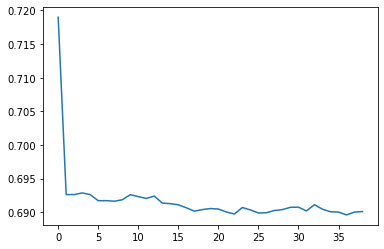

In [172]:
plt.plot(clf.history['loss'])


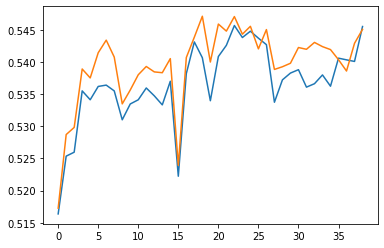

In [173]:
# plot auc
plt.plot(clf.history['train_auc'])
plt.plot(clf.history['valid_auc'])

In [177]:
from sklearn.metrics import roc_auc_score

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid[:,1], y_true=y_valid)

print(f"BEST VALID SCORE FOR CHIP Validation : {clf.best_cost}")
print(f"FINAL TEST SCORE FOR CHIP Validation : {test_auc}")

BEST VALID SCORE FOR CHIP Validation : 0.5470927621565707
FINAL TEST SCORE FOR CHIP Validation : 0.5373497142927846


In [112]:
p = df_model.loc[df_model['ODDRATIO'] < 1.5]

In [113]:
p.describe()

,DP,VD,HIAF,sampleTimePt,gender,REFBIAS,ODDRATIO,chipOrControl
count,103740.000000,103740.000000,103740.000000,103740.000000,103740.000000,103740.000000,103740.000000,103740.000000
mean,5779.483815,98.564585,0.010491,0.521670,0.481762,16.593068,0.995417,0.446925
std,12935.286472,1782.154014,0.063805,0.499533,0.499670,375.452916,0.232099,0.497177
min,2.000000,2.000000,0.001500,0.000000,0.000000,0.000000,0.000000,0.000000
25%,555.000000,2.000000,0.002800,0.000000,0.000000,1.012617,1.012638,0.000000
50%,1269.000000,4.000000,0.003500,1.000000,0.000000,1.020000,1.021900,0.000000
75%,5306.000000,17.000000,0.005200,1.000000,1.000000,1.028689,1.036010,1.000000
max,455487.000000,137339.000000,1.000000,1.000000,1.000000,30215.000000,1.499950,1.000000


In [114]:
X_p = p.drop('chipOrControl', axis = 1) 
y_p = p['chipOrControl'] 

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, train_size=.8, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 10, weights='distance', metric = 'manhattan', algorithm = 'kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.74


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, train_size = 0.8, random_state = 0)

# instantatiate the RFC with 100 ensemble members
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred = dtc.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.69


In [170]:
not22 = dataset1[~dataset1["BIAS"].str.contains("2:2")]

not22 = not22[(not22.chipOrControl != "Blank") & (not22.chipOrControl != "Unknown")]
not22 = not22.dropna(subset=['chipOrControl'])
not22.drop(['d.barcode'], axis=1, inplace=True)
not22.drop_duplicates(inplace=True)
# not22.drop(['MSID', 'd.barcode'], axis=1, inplace=True)
# not22.drop(['sampleTimePt'], axis = 1, inplace=True)

In [171]:
not22

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
19,880,5,0.005700,0.005800,MODERATE,NRAS,chr1:115258768_T/C,Baseline,Male,MS2083,1:0,0:875,0:5,37.000000,0.000000,CHIP
63,1951,5,0.002600,0.002400,HIGH,DNMT3A,chr2:25457291_T/C,Baseline,Male,MS2083,1:0,3:1915,0:5,31.800000,0.000000,CHIP
326,1146,3,0.002600,0.002700,MODERATE,DNMT3A,chr2:25468889_C/T,Baseline,Male,MS2083,1:0,1143:0,3:0,37.000000,0.000000,CHIP
331,1148,3,0.002600,0.002700,MODERATE,DNMT3A,chr2:25468897_T/C,Baseline,Male,MS2083,1:0,1142:2,3:0,37.000000,0.000000,CHIP
556,287,2,0.007000,0.007500,MODERATE,DNMT3A,chr2:25471073_T/C,Baseline,Male,MS2083,1:0,0:284,0:2,37.000000,0.000000,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535644,3632,9,0.002500,0.002500,MODERATE,TET2,chr4:106157594_T/C,Y3,Female,MS6625,1:0,3617:0,9:0,37.000000,0.000000,Control
535902,1351,4,0.003000,0.003000,MODERATE,TET1,chr10:70442701_A/G,Y3,Female,MS6625,1:2,11:1335,2:2,34.000000,116.279070,Control
536244,267,265,0.992500,0.992500,MODERATE,TP53,chr17:7579472_G/C,Y3,Female,MS6625,0:2,0:0,135:130,36.300000,0.000000,Control
536406,1921,5,0.002600,0.002100,MODERATE,ASXL1,chr20:31023391_T/C,Y3,Female,MS6625,1:0,1914:0,5:0,31.800000,0.000000,Control


In [172]:
not22.describe()

,DP,VD,AF,HIAF,QUAL,ODDRATIO
count,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000,5408.000000
mean,2699.934726,75.649223,0.038765,0.038964,35.240311,12.764241
std,3876.411125,1261.088128,0.178787,0.179613,2.932266,206.497146
min,2.000000,2.000000,0.002500,0.001500,22.600000,0.000000
25%,569.000000,2.000000,0.002800,0.002700,34.500000,0.000000
50%,1120.000000,4.000000,0.003300,0.003300,37.000000,0.000000
75%,3405.500000,11.000000,0.004800,0.004700,37.000000,0.000000
max,64779.000000,64389.000000,1.000000,1.000000,37.000000,14285.714286


In [177]:
MSID_id = not22.MSID.unique()

In [181]:
not22.ODDRATIO.describe()

count    5408.000000
mean       12.764241
std       206.497146
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max     14285.714286
Name: ODDRATIO, dtype: float64

In [190]:
not22[not22["MSID"].str.contains(MSID_id[2])].describe()

,DP,VD,AF,HIAF,QUAL,ODDRATIO
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,2375.287879,82.303030,0.019588,0.019694,35.218182,7.156604
std,2361.053473,610.172989,0.121450,0.122029,3.000662,31.506697
min,138.000000,2.000000,0.002500,0.001900,24.300000,0.000000
25%,440.250000,2.000000,0.002725,0.002700,34.600000,0.000000
50%,707.000000,4.000000,0.003200,0.003350,37.000000,0.000000
75%,4140.750000,11.000000,0.005325,0.005250,37.000000,0.000000
max,8026.000000,4964.000000,0.991000,0.995700,37.000000,194.552529


In [187]:
df_model

,DP,VD,HIAF,sampleTimePt,gender,REFBIAS,ODDRATIO,chipOrControl
0,7281,26,0.003300,0.000000,0.000000,1.013348,1.182210,0.000000
4,7282,29,0.003600,0.000000,0.000000,1.009151,1.061729,0.000000
8,7282,24,0.003300,0.000000,0.000000,1.005268,1.005270,0.000000
12,178,2,0.012000,0.000000,0.000000,1.000000,1.000000,0.000000
13,1773,6,0.003500,0.000000,0.000000,1.017162,1.017150,0.000000
...,...,...,...,...,...,...,...,...
536717,711,4,0.005700,1.000000,1.000000,1.008523,1.008510,1.000000
536725,711,2,0.002800,1.000000,1.000000,1.008499,1.008490,1.000000
536733,711,2,0.002900,1.000000,1.000000,1.005666,1.005660,1.000000
536734,711,2,0.002900,1.000000,1.000000,1.008499,1.008490,1.000000


In [193]:
df_new = dataset1
df_new = df_new[(df_new.chipOrControl != "Blank") & (df_new.chipOrControl != "Unknown")]
df_new = df_new.dropna(subset=['chipOrControl'])
df_new.drop(['d.barcode'], axis=1, inplace=True)
df_new.drop_duplicates(inplace=True)

In [268]:
for msid in msid_control:
    arr = df_new[df_new["MSID"].str.contains(msid)].BIAS.value_counts().array
    output = arr[0] / sum(arr) * 100
    print(msid, output)

MS14128 96.46869983948636
MS12593 94.96494582536647
MS16369 96.01108033240997
MS14726 95.85526315789473
MS17705 96.25468164794007
MS6729 95.34883720930233
MS10992 95.62883435582822
MS16523 95.51060680809077
MS7936 95.71948998178506
MS18957 95.55320275277926
MS17215 95.49222797927462
MS15147 95.43549138332557
MS5903 94.89795918367348
MS8886 96.4935064935065
MS4410 95.42595769010863
MS10875 95.97560975609755
MS3545 95.05005561735261
MS16995 95.28508771929825
MS6638 94.71308833010961
MS11166 96.44549763033176
MS9816 95.63014566181127
MS7260 92.76315789473685
MS13311 94.09448818897637
MS1398 94.95327102803738
MS11222 96.60056657223795
MS13994 94.77756286266924
MS10080 94.46870451237264
MS3155 94.25287356321839
MS5082 96.71957671957672
MS18888 97.92802617230099
MS17137 95.96231493943472
MS917 92.44186046511628
MS7993 95.34679543459174
MS13090 95.81497797356829
MS6036 96.26038781163435
MS5053 95.62841530054644
MS8519 93.86792452830188
MS12922 94.1398865784499
MS7933 92.3529411764706
MS5755 9

In [269]:
for msid in msid_control:
    mean = df_new[df_new["MSID"].str.contains(msid)].ODDRATIO.describe().array[1]    
    print(msid, mean)

MS14128 1.306393025960842
MS12593 1.4316821669920452
MS16369 1.3328261935673804
MS14726 2.0903355049920305
MS17705 1.258712031197857
MS6729 1.3796800858561031
MS10992 1.194291553082038
MS16523 1.3411759385617403
MS7936 1.1873549582520972
MS18957 1.7435833434495396
MS17215 1.2544972637417113
MS15147 1.5081535059146696
MS5903 1.345315729341161
MS8886 1.595674080281196
MS4410 1.3214392913890252
MS10875 1.5002479030227136
MS3545 1.7926416690720481
MS16995 1.3298545520127287
MS6638 1.3975958269019984
MS11166 1.3197324303832751
MS9816 2.2990360341102383
MS7260 2.3239723196778614
MS13311 1.1969377202455316
MS1398 1.3302478840891891
MS11222 1.3907422345152243
MS13994 1.2649931297777453
MS10080 1.7559907314385108
MS3155 1.6136733950581104
MS5082 1.4673578335024642
MS18888 1.472893074233952
MS17137 1.4226360721208924
MS917 4.809140679107869
MS7993 1.3220435810147837
MS13090 1.1836626210951962
MS6036 1.6747210457469761
MS5053 1.423192258956749
MS8519 3.301523798899084
MS12922 1.7534395161785352
M

In [285]:
msid_control = []
msid_chip = []

for msid in MSID_id:
    string = df_new[df_new["MSID"].str.contains(msid)].iloc[0][-1]
    if string == "Control":
        msid_control.append(msid)
        
for msid in MSID_id:
    string = df_new[df_new["MSID"].str.contains(msid)].iloc[0][-1]
    if string == "CHIP":
        msid_chip.append(msid)        

In [273]:
df_new[df_new["MSID"].str.contains(msid_control[1])]

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
19576,58125,145,0.002500,0.002500,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Female,MS12593,2:2,29028:28819,74:71,36.200000,1.034758,Control
19580,729,2,0.002700,0.002800,MODERATE,NRAS,chr1:115256479_A/G,Baseline,Female,MS12593,2:2,367:359,1:1,37.000000,1.022260,Control
19581,729,2,0.002700,0.002800,MODERATE,NRAS,chr1:115256490_G/A,Baseline,Female,MS12593,2:2,367:360,1:1,37.000000,1.019420,Control
19582,729,2,0.002700,0.002800,MODERATE,NRAS,chr1:115256495_C/T,Baseline,Female,MS12593,2:2,367:360,1:1,37.000000,1.019420,Control
19583,729,4,0.005500,0.005600,MODERATE,NRAS,chr1:115256496_A/G,Baseline,Female,MS12593,2:2,366:358,2:2,37.000000,1.022320,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26352,312,2,0.006400,0.006600,MODERATE,BRCC3,chrX:154305524_T/G,Y3,Female,MS12593,2:2,156:154,1:1,37.000000,1.012950,Control
26359,312,4,0.012800,0.012900,MODERATE,BRCC3,chrX:154305526_T/C,Y3,Female,MS12593,2:2,155:153,2:2,31.000000,1.013030,Control
26366,312,2,0.006400,0.006500,MODERATE,BRCC3,chrX:154305539_T/C,Y3,Female,MS12593,2:2,156:154,1:1,37.000000,1.012950,Control
26373,312,2,0.006400,0.006600,MODERATE,BRCC3,chrX:154305541_T/C,Y3,Female,MS12593,2:2,156:153,1:1,37.000000,1.019550,Control


In [279]:
df_new[df_new["MSID"].str.contains(MSID_id[10])].AF.mean()

0.013705543071161005

In [284]:
for msid in msid_control:
    mean = df_new[df_new["MSID"].str.contains(msid)].AF.mean()
    print(msid, round(mean, 3))

MS14128 0.01
MS12593 0.01
MS16369 0.01
MS14726 0.011
MS17705 0.014
MS6729 0.01
MS10992 0.008
MS16523 0.009
MS7936 0.008
MS18957 0.008
MS17215 0.009
MS15147 0.009
MS5903 0.007
MS8886 0.009
MS4410 0.012
MS10875 0.013
MS3545 0.008
MS16995 0.011
MS6638 0.012
MS11166 0.011
MS9816 0.009
MS7260 0.011
MS13311 0.046
MS1398 0.02
MS11222 0.011
MS13994 0.03
MS10080 0.018
MS3155 0.016
MS5082 0.009
MS18888 0.013
MS17137 0.016
MS917 0.029
MS7993 0.01
MS13090 0.011
MS6036 0.013
MS5053 0.014
MS8519 0.026
MS12922 0.018
MS7933 0.017
MS5755 0.014
MS11186 0.01
MS4799 0.033
MS10284 0.01
MS6625 0.014


In [286]:
for msid in msid_chip:
    mean = df_new[df_new["MSID"].str.contains(msid)].AF.mean()
    print(msid, round(mean, 3))

MS2083 0.015
MS19025 0.01
MS3780 0.008
MS7722 0.012
MS12481 0.015
MS15959 0.013
MS12115 0.008
MS3685 0.008
MS12457 0.009
MS6594 0.01
MS10108 0.011
MS12764 0.007
MS15567 0.005
MS15229 0.008
MS9695 0.008
MS3098 0.008
MS273 0.009
MS7779 0.009
MS241 0.007
MS11111 0.013
MS2783 0.008
MS14474 0.01
MS15125 0.019
MS7856 0.018
MS10716 0.009
MS15506 0.011
MS484 0.007
MS18179 0.018
MS17898 0.011
MS10285 0.009
MS14469 0.01
MS11887 0.02
MS12869 0.01
MS8569 0.009
MS262 0.011
MS4019 0.009
MS13225 0.017
MS10725 0.009
MS12745 0.012
MS19007 0.008
MS18313 0.011
MS5488 0.011
MS6355 0.012
MS14472 0.011


In [304]:
df_new.loc[df_new['ODDRATIO'] > 0]

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
4,7282,29,0.004000,0.003600,MODERATE,GNB1,chr1:1747250_T/C,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.700000,1.061729,CHIP
8,7282,24,0.003300,0.003300,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,3626:3607,12:12,34.900000,1.005270,CHIP
12,178,2,0.011200,0.012000,MODERATE,NRAS,chr1:115256571_T/C,Baseline,Male,MS2083,2:2,88:88,1:1,37.000000,1.000000,CHIP
13,1773,6,0.003400,0.003500,MODERATE,NRAS,chr1:115258674_T/C,Baseline,Male,MS2083,2:2,889:874,3:3,37.000000,1.017150,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536725,711,2,0.002800,0.002800,MODERATE,BRCC3,chrX:154305513_C/T,Y3,Female,MS6625,2:2,356:353,1:1,31.000000,1.008490,Control
536726,711,2,0.002800,0.002900,MODERATE,BRCC3,chrX:154305518_T/C,Y3,Female,MS6625,2:2,355:353,1:1,37.000000,1.005660,Control
536733,711,2,0.002800,0.002900,HIGH,BRCC3,chrX:154305518_T/C,Y3,Female,MS6625,2:2,355:353,1:1,37.000000,1.005660,Control
536734,711,2,0.002800,0.002900,MODERATE,BRCC3,chrX:154305533_A/T,Y3,Female,MS6625,2:2,356:353,1:1,37.000000,1.008490,Control


In [307]:
df_new = df_new[df_new["BIAS"].str.contains("2:2")]

In [313]:
df_new.describe(percentiles=[0.1, 0.9])

,DP,VD,AF,HIAF,QUAL,ODDRATIO
count,116528.000000,116528.000000,116528.000000,116528.000000,116528.000000,116528.000000
mean,5415.764125,130.912802,0.009313,0.009342,35.426336,1.101164
std,12929.724513,2873.606281,0.054466,0.054792,2.555107,0.406249
min,4.000000,2.000000,0.002500,0.001500,22.500000,1.000000
10%,289.000000,2.000000,0.002600,0.002500,31.000000,1.007120
50%,1024.500000,4.000000,0.003500,0.003500,37.000000,1.023160
90%,14690.000000,46.000000,0.009000,0.009100,37.000000,1.172929
max,455487.000000,319533.000000,0.996600,0.998200,37.000000,17.780939


In [316]:
not22[not22["ODDRATIO"] > 0]

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
2038,2265,8,0.003500,0.003600,MODERATE,PPM1D,chr17:58740384_T/C,Baseline,Male,MS2083,1:2,2236:18,4:4,37.000000,121.127570,CHIP
4991,3072,10,0.003300,0.003000,MODERATE,TET2,chr4:106156252_T/C,Baseline,Female,MS19025,1:2,3034:27,5:5,33.200000,110.171950,CHIP
5647,2526,9,0.003600,0.003700,MODERATE,TET2,chr4:106157305_T/C,Baseline,Female,MS19025,1:2,2468:43,5:4,35.700000,45.478230,CHIP
5911,53,4,0.075500,0.076900,MODERATE,TET2,chr4:106158368_A/G,Baseline,Female,MS19025,1:2,1:48,2:2,37.000000,37.693178,CHIP
8868,614,2,0.003300,0.003300,MODERATE,TET2,chr4:106156715_A/C,Y3,Female,MS19025,1:2,3:606,1:1,37.000000,174.520070,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528716,4509,12,0.002700,0.002700,MODERATE,TET1,chr10:70442701_A/G,Baseline,Male,MS10284,1:2,24:4470,6:6,37.000000,182.149362,Control
529098,2383,8,0.003400,0.003400,MODERATE,ASXL1,chr20:31022632_A/G,Baseline,Male,MS10284,1:2,17:2356,4:4,37.000000,134.952767,Control
531142,1453,7,0.004800,0.005000,MODERATE,TET2,chr4:106157305_T/C,Y3,Male,MS10284,1:2,1430:15,4:3,37.000000,69.630570,Control
531510,132,2,0.015200,0.015600,MODERATE,TET2,chr4:106158368_A/G,Y3,Male,MS10284,1:2,3:126,1:1,37.000000,36.509675,Control


In [321]:
odd5 = dataset1[dataset1["ODDRATIO"] > 5]

In [325]:
odd5 = odd5[(odd5.chipOrControl != "Blank") & (odd5.chipOrControl != "Unknown")]
odd5 = odd5.dropna(subset=['chipOrControl'])
odd5.drop(['d.barcode'], axis=1, inplace=True)
odd5.drop_duplicates(inplace=True)

In [326]:
odd5

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
583,3408,11,0.003200,0.003100,MODERATE,SF3B1,chr2:198266779_G/T,Baseline,Male,MS2083,2:2,1730:1667,1:10,23.500000,10.372070,CHIP
2038,2265,8,0.003500,0.003600,MODERATE,PPM1D,chr17:58740384_T/C,Baseline,Male,MS2083,1:2,2236:18,4:4,37.000000,121.127570,CHIP
4991,3072,10,0.003300,0.003000,MODERATE,TET2,chr4:106156252_T/C,Baseline,Female,MS19025,1:2,3034:27,5:5,33.200000,110.171950,CHIP
5647,2526,9,0.003600,0.003700,MODERATE,TET2,chr4:106157305_T/C,Baseline,Female,MS19025,1:2,2468:43,5:4,35.700000,45.478230,CHIP
5839,6222,16,0.002600,0.002100,MODERATE,TET2,chr4:106157704_C/A,Baseline,Female,MS19025,2:2,3116:3087,14:2,24.700000,6.932890,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531510,132,2,0.015200,0.015600,MODERATE,TET2,chr4:106158368_A/G,Y3,Male,MS10284,1:2,3:126,1:1,37.000000,36.509675,Control
534039,10788,27,0.002500,0.001800,MODERATE,TET2,chr4:106157704_C/A,Baseline,Female,MS6625,2:2,5414:5345,23:4,24.000000,5.675691,Control
534087,3947,36,0.009100,0.009000,MODERATE,TET2,chr4:106158106_T/G,Baseline,Female,MS6625,2:2,1970:1935,33:3,26.500000,10.797970,Control
535902,1351,4,0.003000,0.003000,MODERATE,TET1,chr10:70442701_A/G,Y3,Female,MS6625,1:2,11:1335,2:2,34.000000,116.279070,Control


In [329]:
odd5[odd5["BIAS"].str.contains("2:2")]

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
583,3408,11,0.003200,0.003100,MODERATE,SF3B1,chr2:198266779_G/T,Baseline,Male,MS2083,2:2,1730:1667,1:10,23.500000,10.372070,CHIP
5839,6222,16,0.002600,0.002100,MODERATE,TET2,chr4:106157704_C/A,Baseline,Female,MS19025,2:2,3116:3087,14:2,24.700000,6.932890,CHIP
7264,30715,30255,0.985000,0.993100,MODERATE,LIPI,chr21:15481365_G/T,Baseline,Female,MS19025,2:2,2:20,15220:15035,35.400000,10.121457,CHIP
24428,8424,62,0.007400,0.006300,MODERATE,TET2,chr4:106157705_C/A,Y3,Female,MS12593,2:2,4151:4206,57:5,23.000000,11.544678,Control
24500,4902,53,0.010800,0.010700,MODERATE,TET2,chr4:106158106_T/G,Y3,Female,MS12593,2:2,2428:2411,48:5,26.700000,9.529255,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528260,7046,70,0.009900,0.009600,MODERATE,TET2,chr4:106158106_T/G,Baseline,Male,MS10284,2:2,3487:3481,65:5,26.600000,12.978585,Control
529168,3009,18,0.006000,0.005800,MODERATE,ASXL1,chr20:31023623_T/G,Baseline,Male,MS10284,2:2,1493:1497,16:2,26.000000,8.017317,Control
534039,10788,27,0.002500,0.001800,MODERATE,TET2,chr4:106157704_C/A,Baseline,Female,MS6625,2:2,5414:5345,23:4,24.000000,5.675691,Control
534087,3947,36,0.009100,0.009000,MODERATE,TET2,chr4:106158106_T/G,Baseline,Female,MS6625,2:2,1970:1935,33:3,26.500000,10.797970,Control


In [331]:
highaf = dataset1[dataset1["AF"] > 0.1]

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
716,4010289633,4201,2113,0.503000,0.502500,MODERATE,TET2,chr4:106155620_C/A,Baseline,Male,MS2083,2:2,1046:1035,1066:1047,35.800000,1.007435,CHIP
717,4010289633,4201,2113,0.503000,0.502500,MODERATE,TET2,chr4:106155620_C/A,Baseline,Male,MS2083,2:2,1046:1035,1066:1047,35.800000,1.007435,CHIP
718,4010289633,4201,2113,0.503000,0.502500,MODERATE,TET2,chr4:106155620_C/A,Baseline,Male,MS2083,2:2,1046:1035,1066:1047,35.800000,1.007435,CHIP
719,4010289633,4201,2113,0.503000,0.502500,MODERATE,TET2,chr4:106155620_C/A,Baseline,Male,MS2083,2:2,1046:1035,1066:1047,35.800000,1.007435,CHIP
720,4010289633,4201,2113,0.503000,0.502500,MODERATE,TET2,chr4:106155620_C/A,Baseline,Male,MS2083,2:2,1046:1035,1066:1047,35.800000,1.007435,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137381,4010290016,2,2,1.000000,1.000000,MODERATE,SRSF2,chr17:74733127_C/T,Blank,Blank,NaN,0:2,0:0,1:1,37.000000,0.000000,NaN
1137465,4010290016,6,6,1.000000,1.000000,MODERATE,ASXL1,chr20:31022959_T/C,Blank,Blank,NaN,0:2,0:0,3:3,30.700000,0.000000,NaN
1137466,4010290016,6,6,1.000000,1.000000,MODERATE,ASXL1,chr20:31022959_T/C,Blank,Blank,NaN,0:2,0:0,3:3,30.700000,0.000000,NaN
1137647,4010290016,11593,7543,0.650700,0.649700,MODERATE,LIPI,chr21:15481365_G/T,Blank,Blank,NaN,2:2,2003:1987,3797:3746,35.500000,1.005520,NaN


In [336]:
highaf = dataset1[dataset1["AF"] > 0.1]

highaf = highaf[(highaf.chipOrControl != "Blank") & (highaf.chipOrControl != "Unknown")]
highaf = highaf.dropna(subset=['chipOrControl'])
highaf.drop(['d.barcode'], axis=1, inplace=True)
highaf.drop_duplicates(inplace=True)

In [337]:
highaf[]

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
716,4201,2113,0.503000,0.502500,MODERATE,TET2,chr4:106155620_C/A,Baseline,Male,MS2083,2:2,1046:1035,1066:1047,35.800000,1.007435,CHIP
1332,2,2,1.000000,1.000000,HIGH,TET2,chr4:106157527_C/T,Baseline,Male,MS2083,0:2,0:0,1:1,31.000000,0.000000,CHIP
1587,2673,539,0.201600,0.201700,MODERATE,TET2,chr4:106190798_G/T,Baseline,Male,MS2083,2:2,1078:1056,272:267,35.600000,1.002070,CHIP
1635,6354,3092,0.486600,0.485900,MODERATE,TET2,chr4:106196951_A/G,Baseline,Male,MS2083,2:2,1634:1597,1569:1523,35.500000,1.006877,CHIP
1649,1285,636,0.494900,0.496800,MODERATE,SNX18,chr5:53815495_A/C,Baseline,Male,MS2083,2:2,324:323,320:316,36.200000,1.009530,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535806,8029,4008,0.499200,0.498600,MODERATE,TET2,chr4:106196951_A/G,Y3,Female,MS6625,2:2,2012:1978,2032:1976,35.500000,1.010959,Control
535898,10,2,0.200000,0.200000,MODERATE,NOTCH1,chr9:139413972_C/T,Y3,Female,MS6625,2:2,4:4,1:1,37.000000,1.000000,Control
536244,267,265,0.992500,0.992500,MODERATE,TP53,chr17:7579472_G/C,Y3,Female,MS6625,0:2,0:0,135:130,36.300000,0.000000,Control
536382,6820,6749,0.989600,0.996200,MODERATE,ASXL1,chr20:31022959_T/C,Y3,Female,MS6625,2:2,2:2,3408:3341,35.700000,1.020054,Control


In [339]:
highaf[highaf["IMPACT"].str.contains("HIGH")].chipOrControl.value_counts()

CHIP       56
Control    12
Name: chipOrControl, dtype: int64

In [348]:
highaf

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
716,4201,2113,0.503000,0.502500,MODERATE,TET2,chr4:106155620_C/A,Baseline,Male,MS2083,2:2,1046:1035,1066:1047,35.800000,1.007435,CHIP
1332,2,2,1.000000,1.000000,HIGH,TET2,chr4:106157527_C/T,Baseline,Male,MS2083,0:2,0:0,1:1,31.000000,0.000000,CHIP
1587,2673,539,0.201600,0.201700,MODERATE,TET2,chr4:106190798_G/T,Baseline,Male,MS2083,2:2,1078:1056,272:267,35.600000,1.002070,CHIP
1635,6354,3092,0.486600,0.485900,MODERATE,TET2,chr4:106196951_A/G,Baseline,Male,MS2083,2:2,1634:1597,1569:1523,35.500000,1.006877,CHIP
1649,1285,636,0.494900,0.496800,MODERATE,SNX18,chr5:53815495_A/C,Baseline,Male,MS2083,2:2,324:323,320:316,36.200000,1.009530,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535806,8029,4008,0.499200,0.498600,MODERATE,TET2,chr4:106196951_A/G,Y3,Female,MS6625,2:2,2012:1978,2032:1976,35.500000,1.010959,Control
535898,10,2,0.200000,0.200000,MODERATE,NOTCH1,chr9:139413972_C/T,Y3,Female,MS6625,2:2,4:4,1:1,37.000000,1.000000,Control
536244,267,265,0.992500,0.992500,MODERATE,TP53,chr17:7579472_G/C,Y3,Female,MS6625,0:2,0:0,135:130,36.300000,0.000000,Control
536382,6820,6749,0.989600,0.996200,MODERATE,ASXL1,chr20:31022959_T/C,Y3,Female,MS6625,2:2,2:2,3408:3341,35.700000,1.020054,Control


In [349]:
df_new[df_new["IMPACT"].str.contains("MODERATE")].chipOrControl.value_counts()

CHIP       61277
Control    49533
Name: chipOrControl, dtype: int64

In [350]:
df_new = preprocessing.loci_split(df_new)

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
4,7282,29,0.004000,0.003600,MODERATE,GNB1,chr1:1747250_T/C,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.700000,1.061729,CHIP
8,7282,24,0.003300,0.003300,MODERATE,GNB1,chr1:1747256_T/C,Baseline,Male,MS2083,2:2,3626:3607,12:12,34.900000,1.005270,CHIP
12,178,2,0.011200,0.012000,MODERATE,NRAS,chr1:115256571_T/C,Baseline,Male,MS2083,2:2,88:88,1:1,37.000000,1.000000,CHIP
13,1773,6,0.003400,0.003500,MODERATE,NRAS,chr1:115258674_T/C,Baseline,Male,MS2083,2:2,889:874,3:3,37.000000,1.017150,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536725,711,2,0.002800,0.002800,MODERATE,BRCC3,chrX:154305513_C/T,Y3,Female,MS6625,2:2,356:353,1:1,31.000000,1.008490,Control
536726,711,2,0.002800,0.002900,MODERATE,BRCC3,chrX:154305518_T/C,Y3,Female,MS6625,2:2,355:353,1:1,37.000000,1.005660,Control
536733,711,2,0.002800,0.002900,HIGH,BRCC3,chrX:154305518_T/C,Y3,Female,MS6625,2:2,355:353,1:1,37.000000,1.005660,Control
536734,711,2,0.002800,0.002900,MODERATE,BRCC3,chrX:154305533_A/T,Y3,Female,MS6625,2:2,356:353,1:1,37.000000,1.008490,Control


<AxesSubplot:xlabel='chipOrControl', ylabel='count'>

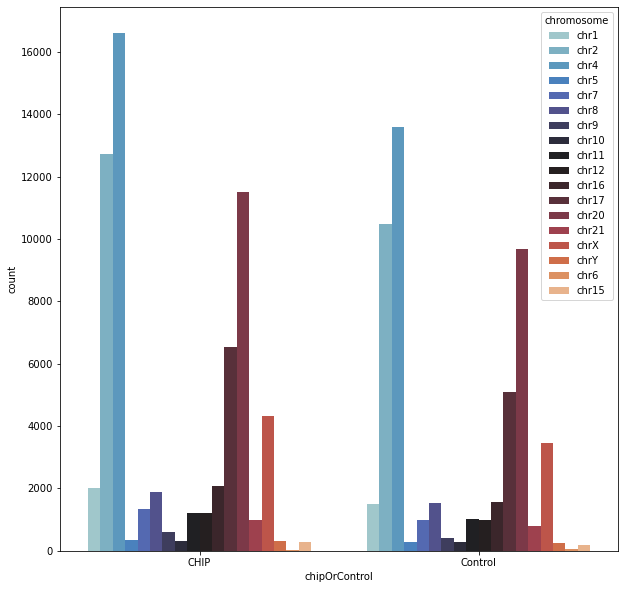

In [356]:
fig = plt.figure(figsize = (10, 10))
sns.countplot(x= 'chipOrControl', data = df_new, hue = 'chromosome', palette='icefire')

<AxesSubplot:xlabel='chipOrControl', ylabel='count'>

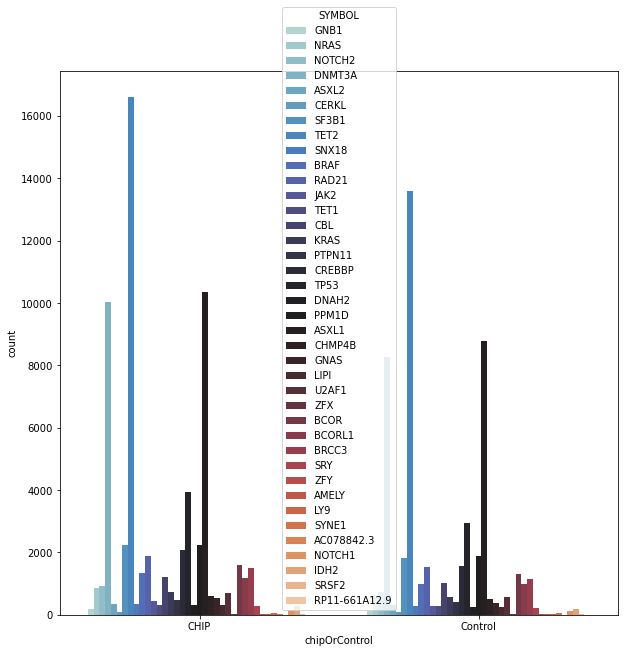

In [391]:
fig = plt.figure(figsize = (10, 10))
sns.countplot(x= 'chipOrControl', data = df_new, hue = 'SYMBOL', palette='icefire')

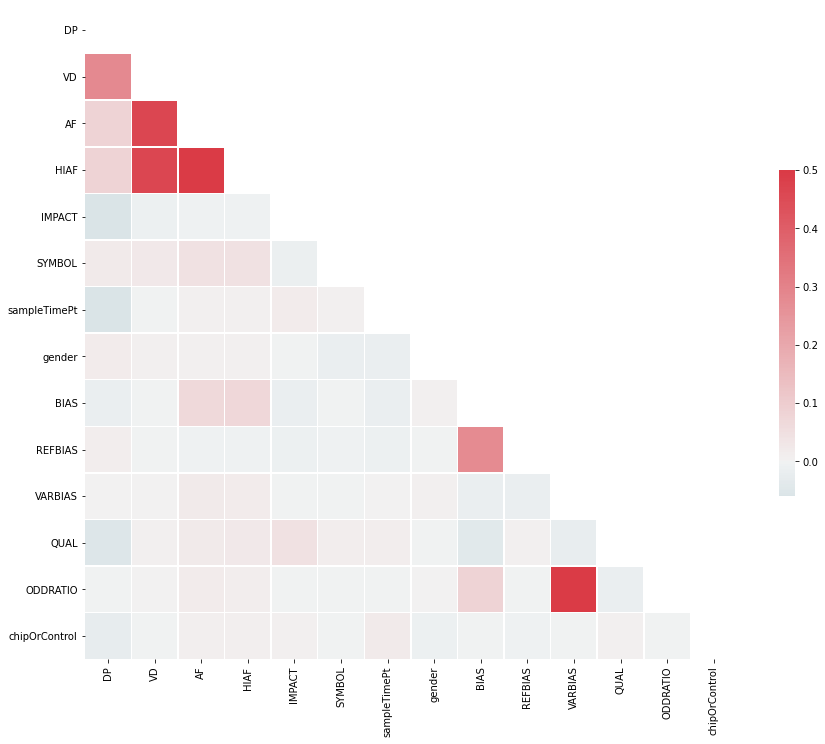

In [393]:
corr = df.select_dtypes(exclude='object').corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 12));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True);

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [394]:
df_new

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,chromosome,chromosome_loc,nucleotide
0,7281,26,0.003600,0.003300,MODERATE,GNB1,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP,chr1,1747196,T/C
4,7282,29,0.004000,0.003600,MODERATE,GNB1,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.700000,1.061729,CHIP,chr1,1747250,T/C
8,7282,24,0.003300,0.003300,MODERATE,GNB1,Baseline,Male,MS2083,2:2,3626:3607,12:12,34.900000,1.005270,CHIP,chr1,1747256,T/C
12,178,2,0.011200,0.012000,MODERATE,NRAS,Baseline,Male,MS2083,2:2,88:88,1:1,37.000000,1.000000,CHIP,chr1,115256571,T/C
13,1773,6,0.003400,0.003500,MODERATE,NRAS,Baseline,Male,MS2083,2:2,889:874,3:3,37.000000,1.017150,CHIP,chr1,115258674,T/C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536725,711,2,0.002800,0.002800,MODERATE,BRCC3,Y3,Female,MS6625,2:2,356:353,1:1,31.000000,1.008490,Control,chrX,154305513,C/T
536726,711,2,0.002800,0.002900,MODERATE,BRCC3,Y3,Female,MS6625,2:2,355:353,1:1,37.000000,1.005660,Control,chrX,154305518,T/C
536733,711,2,0.002800,0.002900,HIGH,BRCC3,Y3,Female,MS6625,2:2,355:353,1:1,37.000000,1.005660,Control,chrX,154305518,T/C
536734,711,2,0.002800,0.002900,MODERATE,BRCC3,Y3,Female,MS6625,2:2,356:353,1:1,37.000000,1.008490,Control,chrX,154305533,A/T


In [108]:
con_highaf = []

for msid in df.MSID.unique():
    mean = df[df["MSID"].str.contains(msid)].AF.mean()
    chip_bool = df[df["MSID"].str.contains(msid)].iloc[0].chipOrControl
    
    if mean > 0.02 and chip_bool == "Control":
        con_highaf.append(msid)
    print(msid, chip_bool, round(mean, 3))

MS2083 CHIP 0.01
MS19025 CHIP 0.009
MS14128 Control 0.01
MS12593 Control 0.007
MS3780 CHIP 0.007
MS7722 CHIP 0.01
MS16369 Control 0.008
MS14726 Control 0.009
MS12481 CHIP 0.014
MS15959 CHIP 0.011
MS17705 Control 0.01
MS6729 Control 0.011
MS12115 CHIP 0.007
MS3685 CHIP 0.007
MS10992 Control 0.008
MS16523 Control 0.009
MS12457 CHIP 0.009
MS6594 CHIP 0.009
MS7936 Control 0.008
MS18957 Control 0.008
MS10108 CHIP 0.01
MS12764 CHIP 0.007
MS17215 Control 0.008
MS15147 Control 0.008
MS15567 CHIP 0.005
MS15229 CHIP 0.008
MS5903 Control 0.006
MS8886 Control 0.008
MS9695 CHIP 0.007
MS3098 CHIP 0.008
MS4410 Control 0.009
MS10875 Control 0.012
MS273 CHIP 0.009
MS7779 CHIP 0.009
MS3545 Control 0.008
MS16995 Control 0.01
MS241 CHIP 0.006
MS11111 CHIP 0.011
MS6638 Control 0.01
MS11166 Control 0.009
MS2783 CHIP 0.007
MS14474 CHIP 0.01
MS9816 Control 0.008
MS7260 Control 0.01
MS15125 CHIP 0.016
MS7856 CHIP 0.015
MS13311 Control 0.024
MS1398 Control 0.013
MS10716 CHIP 0.009
MS15506 CHIP 0.009
MS11222 Con

In [109]:
con_highaf

['MS13311', 'MS13994', 'MS917', 'MS8519', 'MS4799']

In [97]:
df[df["MSID"].str.contains("MS13311")].describe(include="all")

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,chromosome,chromosome_loc,nucleotide
count,254.000000,254.000000,254.000000,254.000000,254,254,254,254,254,254,254.000000,254.000000,254.000000,254.000000,254,254,254,254
unique,nan,nan,nan,nan,2,22,2,1,1,6,nan,nan,nan,nan,1,14,251,23
top,nan,nan,nan,nan,MODERATE,TET2,Baseline,Male,MS13311,2:2,nan,nan,nan,nan,Control,chr2,106196951,T/C
freq,nan,nan,nan,nan,234,59,239,254,254,239,nan,nan,nan,nan,254,59,2,84
mean,15695.795276,601.251969,0.045592,0.045840,NaN,NaN,NaN,NaN,NaN,NaN,2.249472,0.955420,35.465354,1.196938,NaN,NaN,NaN,NaN
std,41489.726840,6474.113525,0.173008,0.172935,NaN,NaN,NaN,NaN,NaN,NaN,17.717753,0.207915,2.482281,2.705461,NaN,NaN,NaN,NaN
min,2.000000,2.000000,0.002500,0.001800,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,25.000000,0.000000,NaN,NaN,NaN,NaN
25%,295.500000,2.000000,0.002700,0.002700,NaN,NaN,NaN,NaN,NaN,NaN,1.010667,1.000000,35.000000,1.010650,NaN,NaN,NaN,NaN
50%,756.000000,3.500000,0.003800,0.003800,NaN,NaN,NaN,NaN,NaN,NaN,1.019578,1.000000,37.000000,1.021071,NaN,NaN,NaN,NaN
75%,12942.000000,36.000000,0.007900,0.008250,NaN,NaN,NaN,NaN,NaN,NaN,1.025542,1.000000,37.000000,1.036243,NaN,NaN,NaN,NaN


In [110]:
df[df["MSID"].str.contains("MS13994")].describe(include="all")

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,chromosome,chromosome_loc,nucleotide
count,490.000000,490.000000,490.000000,490.000000,490,490,490,490,490,490,490.000000,490.000000,490.000000,490.000000,490,490,490,490
unique,nan,nan,nan,nan,2,29,2,1,1,1,nan,nan,nan,nan,1,16,489,25
top,nan,nan,nan,nan,MODERATE,TET2,Baseline,Female,MS13994,2:2,nan,nan,nan,nan,Control,chr2,25463179,A/G
freq,nan,nan,nan,nan,461,107,296,490,490,490,nan,nan,nan,nan,490,107,2,200
mean,8344.320408,401.291837,0.020561,0.020768,NaN,NaN,NaN,NaN,NaN,NaN,1.018103,1.041799,35.352857,1.115856,NaN,NaN,NaN,NaN
std,16641.103719,6078.108884,0.090276,0.091465,NaN,NaN,NaN,NaN,NaN,NaN,0.052555,0.620540,2.436163,0.653396,NaN,NaN,NaN,NaN
min,8.000000,2.000000,0.002500,0.001700,NaN,NaN,NaN,NaN,NaN,NaN,0.194030,0.451613,25.000000,1.000000,NaN,NaN,NaN,NaN
25%,537.000000,2.000000,0.002800,0.002700,NaN,NaN,NaN,NaN,NaN,NaN,1.012530,1.000000,34.600000,1.013920,NaN,NaN,NaN,NaN
50%,1852.000000,8.000000,0.003250,0.003300,NaN,NaN,NaN,NaN,NaN,NaN,1.019314,1.000000,36.500000,1.024623,NaN,NaN,NaN,NaN
75%,9907.750000,30.000000,0.006900,0.006925,NaN,NaN,NaN,NaN,NaN,NaN,1.026616,1.000000,37.000000,1.046342,NaN,NaN,NaN,NaN


In [99]:
df[df["MSID"].str.contains("MS13994")].describe(include="all")

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,chromosome,chromosome_loc,nucleotide
count,517.000000,517.000000,517.000000,517.000000,517,517,517,517,517,517,517.000000,517.000000,517.000000,517.000000,517,517,517,517
unique,nan,nan,nan,nan,2,30,2,1,1,7,nan,nan,nan,nan,1,16,513,25
top,nan,nan,nan,nan,MODERATE,TET2,Baseline,Female,MS13994,2:2,nan,nan,nan,nan,Control,chr4,53815495,A/G
freq,nan,nan,nan,nan,488,119,318,517,517,490,nan,nan,nan,nan,517,119,2,208
mean,8106.106383,381.127660,0.030324,0.030502,NaN,NaN,NaN,NaN,NaN,NaN,12.603838,0.998973,35.286654,1.264993,NaN,NaN,NaN,NaN
std,16253.129743,5917.577503,0.131837,0.132597,NaN,NaN,NaN,NaN,NaN,NaN,259.478771,0.638188,2.519635,4.718901,NaN,NaN,NaN,NaN
min,2.000000,2.000000,0.002500,0.001700,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,23.000000,0.000000,NaN,NaN,NaN,NaN
25%,537.000000,2.000000,0.002800,0.002700,NaN,NaN,NaN,NaN,NaN,NaN,1.012063,1.000000,34.500000,1.012510,NaN,NaN,NaN,NaN
50%,1974.000000,8.000000,0.003300,0.003300,NaN,NaN,NaN,NaN,NaN,NaN,1.018605,1.000000,36.400000,1.023340,NaN,NaN,NaN,NaN
75%,9890.000000,29.000000,0.006900,0.007000,NaN,NaN,NaN,NaN,NaN,NaN,1.026515,1.000000,37.000000,1.043730,NaN,NaN,NaN,NaN


In [100]:
df[df["MSID"].str.contains("MS917")].describe(include="all")

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,chromosome,chromosome_loc,nucleotide
count,344.000000,344.000000,344.000000,344.000000,344,344,344,344,344,344,344.000000,344.000000,344.000000,344.000000,344,344,344,344
unique,nan,nan,nan,nan,2,28,2,1,1,5,nan,nan,nan,nan,1,15,314,15
top,nan,nan,nan,nan,MODERATE,TET2,Y3,Female,MS917,2:2,nan,nan,nan,nan,Control,chr2,182413273,T/C
freq,nan,nan,nan,nan,329,82,216,344,344,318,nan,nan,nan,nan,344,90,2,138
mean,5278.319767,148.694767,0.028980,0.029240,NaN,NaN,NaN,NaN,NaN,NaN,2.227060,1.002217,35.008430,4.809141,NaN,NaN,NaN,NaN
std,5837.681384,1080.431310,0.146035,0.146938,NaN,NaN,NaN,NaN,NaN,NaN,19.230756,0.690939,2.715223,64.312748,NaN,NaN,NaN,NaN
min,2.000000,2.000000,0.002500,0.001600,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,22.800000,0.000000,NaN,NaN,NaN,NaN
25%,1526.000000,4.000000,0.002600,0.002600,NaN,NaN,NaN,NaN,NaN,NaN,1.010797,1.000000,34.000000,1.012602,NaN,NaN,NaN,NaN
50%,3548.000000,11.000000,0.003000,0.002900,NaN,NaN,NaN,NaN,NaN,NaN,1.017031,1.000000,36.100000,1.021200,NaN,NaN,NaN,NaN
75%,6757.250000,23.000000,0.003800,0.003800,NaN,NaN,NaN,NaN,NaN,NaN,1.023936,1.000000,37.000000,1.069389,NaN,NaN,NaN,NaN


In [101]:
df[df["MSID"].str.contains("MS8519")].describe(include="all")

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,chromosome,chromosome_loc,nucleotide
count,424.000000,424.000000,424.000000,424.000000,424,424,424,424,424,424,424.000000,424.000000,424.000000,424.000000,424,424,424,424
unique,nan,nan,nan,nan,2,31,2,1,1,6,nan,nan,nan,nan,1,16,375,23
top,nan,nan,nan,nan,MODERATE,TET2,Baseline,Male,MS8519,2:2,nan,nan,nan,nan,Control,chr4,182413273,A/G
freq,nan,nan,nan,nan,405,108,252,424,424,398,nan,nan,nan,nan,424,108,2,189
mean,9373.735849,856.219340,0.025686,0.025657,NaN,NaN,NaN,NaN,NaN,NaN,17.758542,1.015561,35.208491,3.301524,NaN,NaN,NaN,NaN
std,24001.757072,9196.311987,0.121431,0.121762,NaN,NaN,NaN,NaN,NaN,NaN,305.555238,0.692242,2.500633,24.073576,NaN,NaN,NaN,NaN
min,4.000000,2.000000,0.002500,0.001700,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,22.900000,0.000000,NaN,NaN,NaN,NaN
25%,747.000000,4.000000,0.002700,0.002700,NaN,NaN,NaN,NaN,NaN,NaN,1.011637,1.000000,34.400000,1.012205,NaN,NaN,NaN,NaN
50%,3543.000000,11.500000,0.003200,0.003200,NaN,NaN,NaN,NaN,NaN,NaN,1.017856,1.000000,36.100000,1.021075,NaN,NaN,NaN,NaN
75%,8245.000000,25.000000,0.004400,0.004425,NaN,NaN,NaN,NaN,NaN,NaN,1.024892,1.000000,37.000000,1.047543,NaN,NaN,NaN,NaN


In [102]:
df[df["MSID"].str.contains("MS4799")].describe(include="all")

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,chromosome,chromosome_loc,nucleotide
count,482.000000,482.000000,482.000000,482.000000,482,482,482,482,482,482,482.000000,482.000000,482.000000,482.000000,482,482,482,482
unique,nan,nan,nan,nan,2,27,2,1,1,6,nan,nan,nan,nan,1,16,471,20
top,nan,nan,nan,nan,MODERATE,TET2,Baseline,Female,MS4799,2:2,nan,nan,nan,nan,Control,chr20,154306921,A/G
freq,nan,nan,nan,nan,468,102,426,482,482,447,nan,nan,nan,nan,482,104,2,217
mean,5328.568465,110.234440,0.033145,0.033725,NaN,NaN,NaN,NaN,NaN,NaN,5.525710,0.961388,35.269295,1.611638,NaN,NaN,NaN,NaN
std,6051.788613,1309.791471,0.121519,0.123432,NaN,NaN,NaN,NaN,NaN,NaN,65.081552,0.301492,2.121323,9.466701,NaN,NaN,NaN,NaN
min,4.000000,2.000000,0.002500,0.001900,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,24.300000,0.000000,NaN,NaN,NaN,NaN
25%,1466.000000,6.000000,0.002700,0.002625,NaN,NaN,NaN,NaN,NaN,NaN,1.008487,1.000000,34.400000,1.010150,NaN,NaN,NaN,NaN
50%,4052.000000,12.000000,0.003100,0.003100,NaN,NaN,NaN,NaN,NaN,NaN,1.016362,1.000000,36.000000,1.021490,NaN,NaN,NaN,NaN
75%,7517.000000,23.000000,0.004300,0.004300,NaN,NaN,NaN,NaN,NaN,NaN,1.023586,1.000000,37.000000,1.064544,NaN,NaN,NaN,NaN
